# Libraries

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from importlib import reload
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

# Dataset

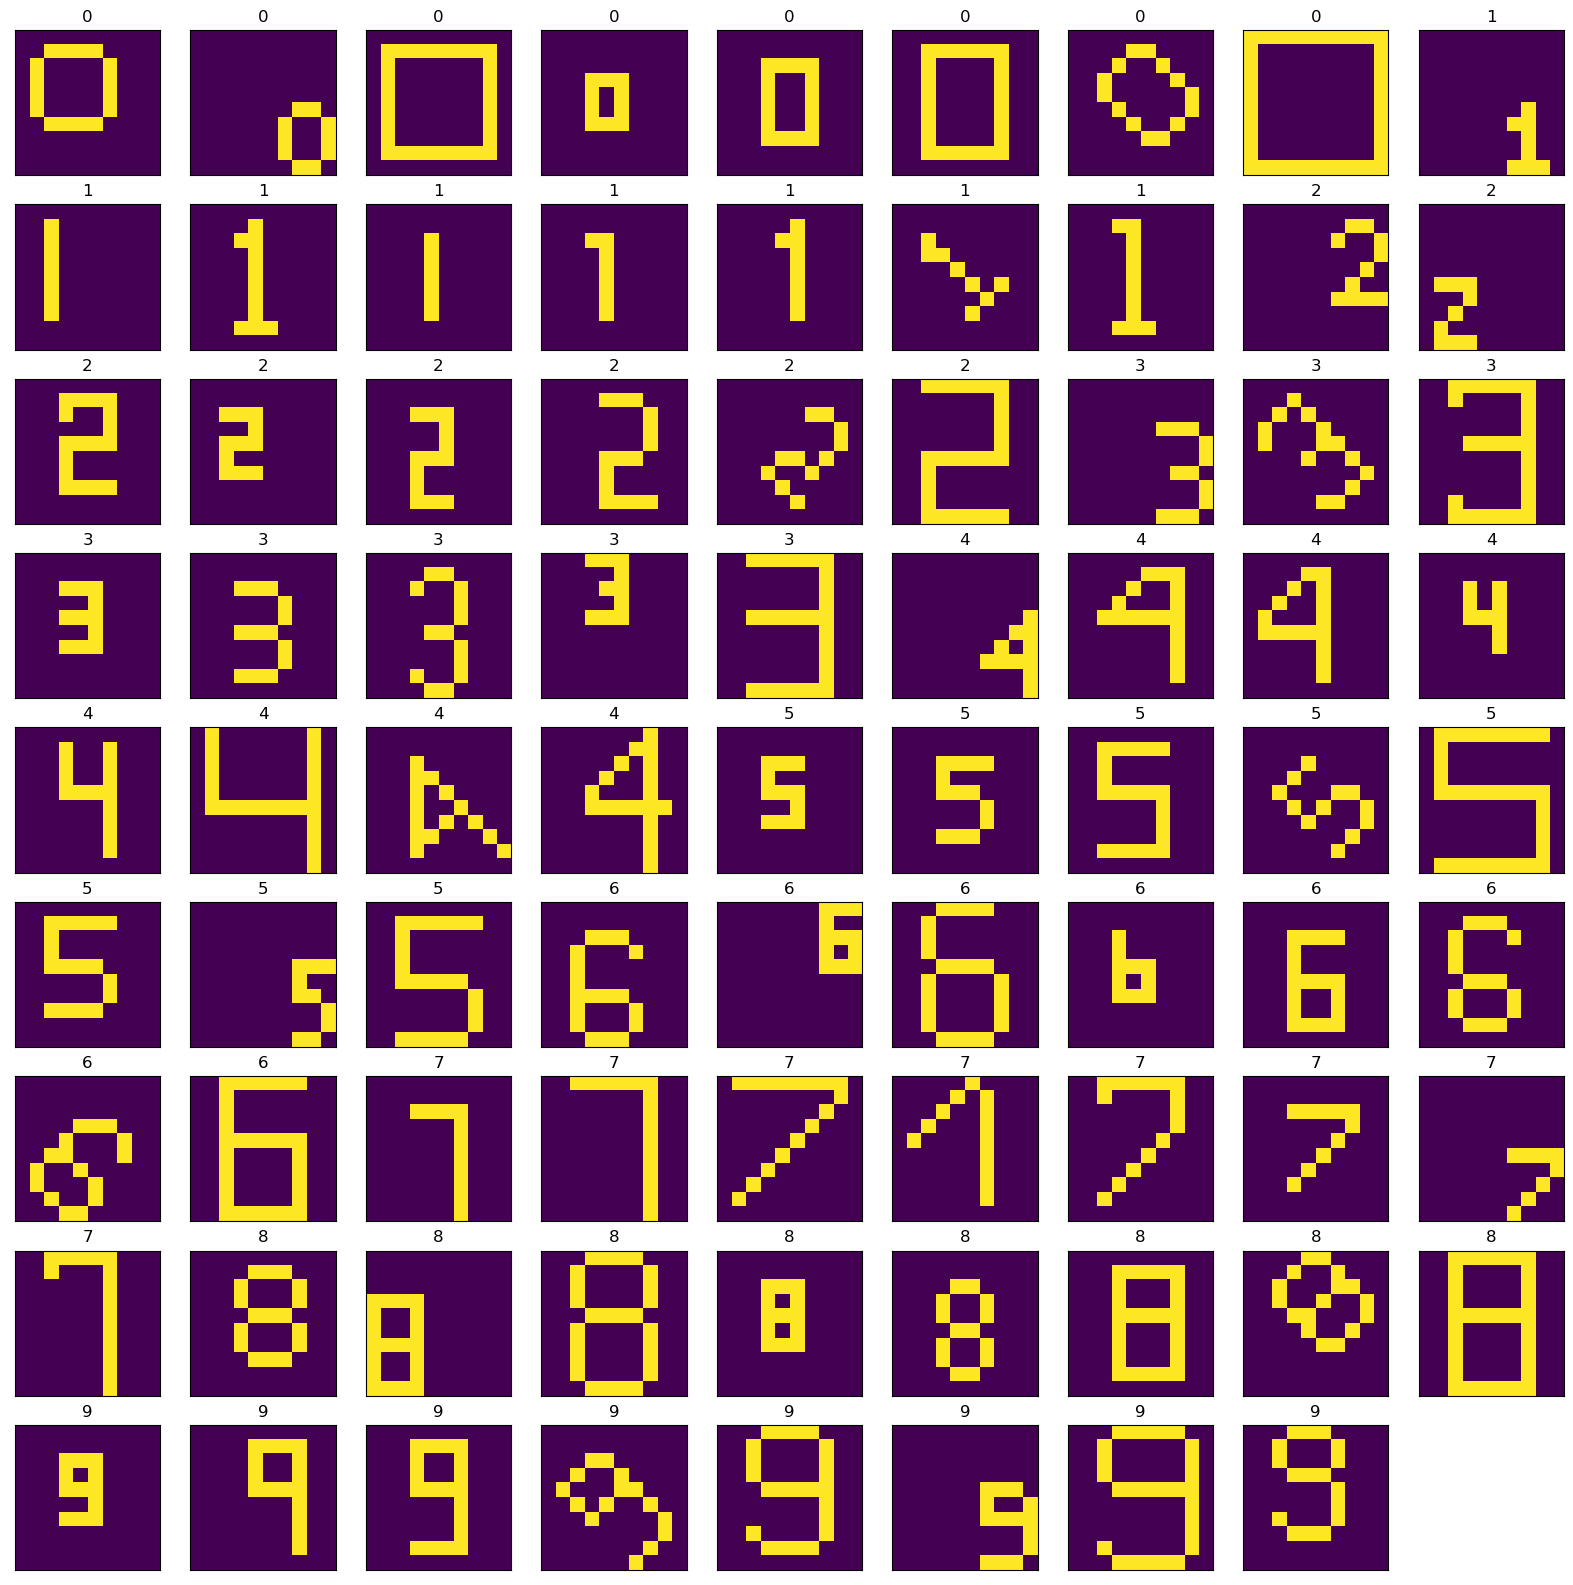

In [2]:
dataset = pd.read_csv('../Dataset/digit.csv')
data = dataset.iloc[:, 0:-1]
label = dataset.iloc[:, -1]

numbers_to_display = 80
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20, 20))
for i in range(numbers_to_display):
    ax = plt.subplot(num_cells, num_cells, i + 1)
    im = ax.imshow(data.iloc[i].values.reshape(10, 10))
    plt.xlabel = ''
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plt.title(label.iloc[i])

# MLP Model with Various Activation Function

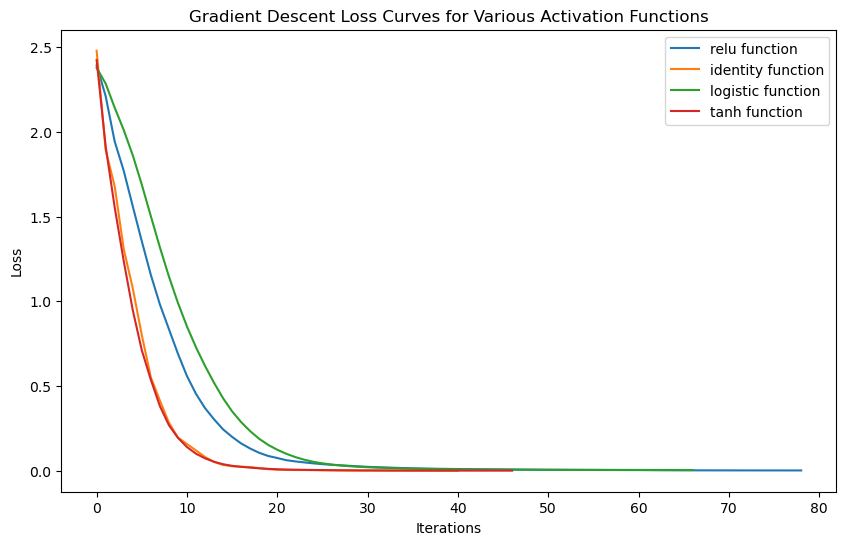

In [3]:
activation_functions = ['relu', 'identity', 'logistic', 'tanh']

plt.figure(figsize=(10, 6))

for activation_function in activation_functions:
    model = MLP(hidden_layer_sizes = (15,), activation = activation_function,
                learning_rate_init = 0.1, random_state = 42)
    model.fit(data, label)
    
    pred = model.predict(data)
    
    plt.plot(model.loss_curve_, label = f'{activation_function} function')

plt.gca().set_xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Gradient Descent Loss Curves for Various Activation Functions')
plt.legend()
plt.show()

# MLP Model with Various Hidden Layer Sizes

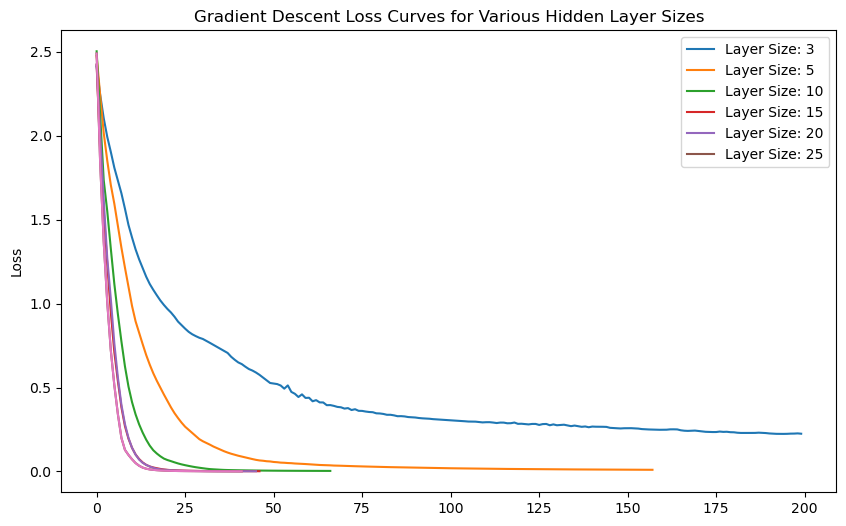

In [4]:
hidden_layers = [3, 5, 10, 15, 20, 25]

plt.figure(figsize=(10, 6))

for layer_size in hidden_layers:
    model = MLP(hidden_layer_sizes = (layer_size,), activation = 'tanh',
                learning_rate_init = 0.1, random_state = 42)
    model.fit(data, label)
    
    pred = model.predict(data)
    
    plt.plot(model.loss_curve_, label = f'Layer Size: {layer_size}')

plt.plot(model.loss_curve_)
plt.ylabel('Loss')
plt.title('Gradient Descent Loss Curves for Various Hidden Layer Sizes')
plt.legend()
plt.show()

# MLP Model with Various Learning Rates

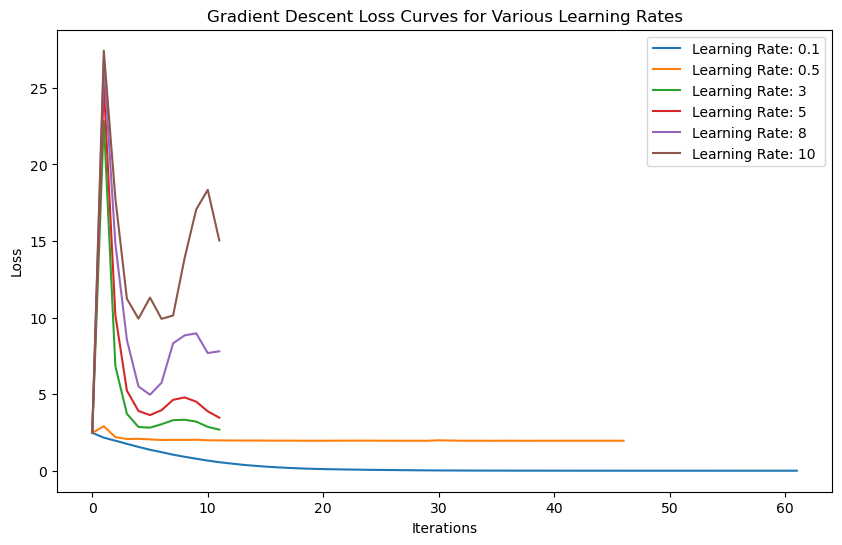

In [5]:
learning_rates = [0.1, 0.5, 3, 5, 8, 10]

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    model = MLP(hidden_layer_sizes=(10,), activation='relu',
                learning_rate_init=lr, random_state=42)
    model.fit(data, label)
    
    pred = model.predict(data)
    
    plt.plot(model.loss_curve_, label=f'Learning Rate: {lr}')

plt.gca().set_xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Gradient Descent Loss Curves for Various Learning Rates')
plt.legend()
plt.show()

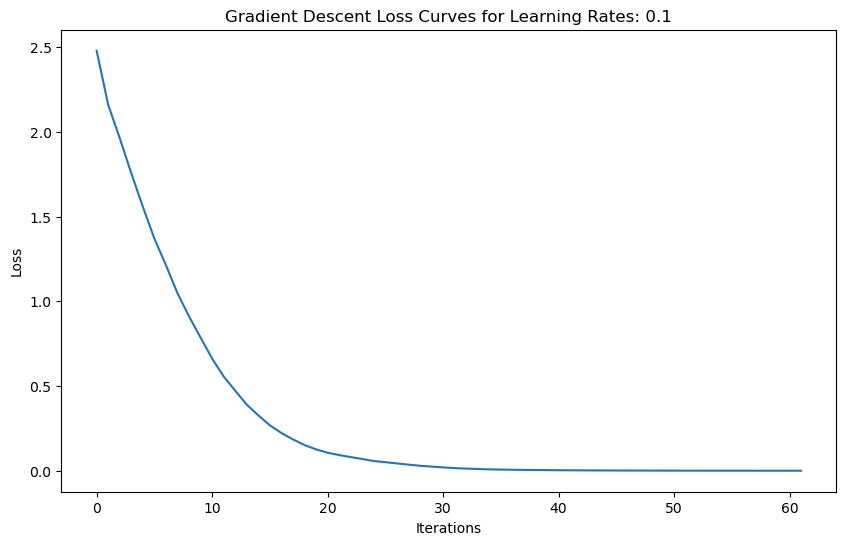

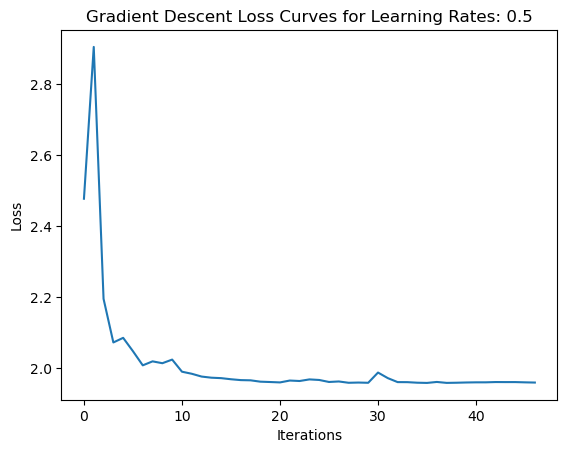

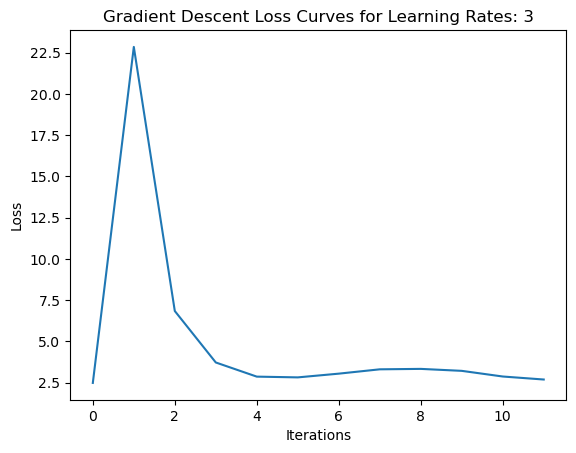

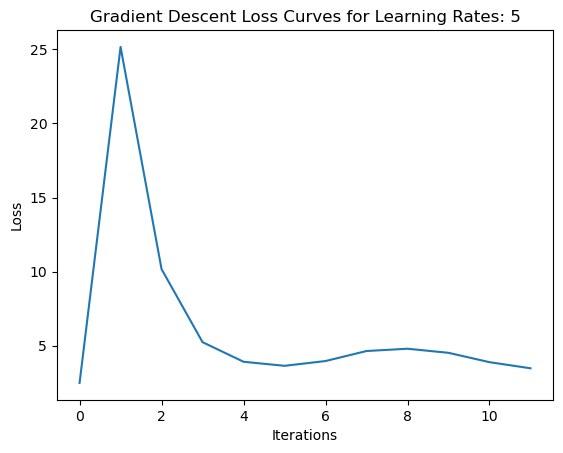

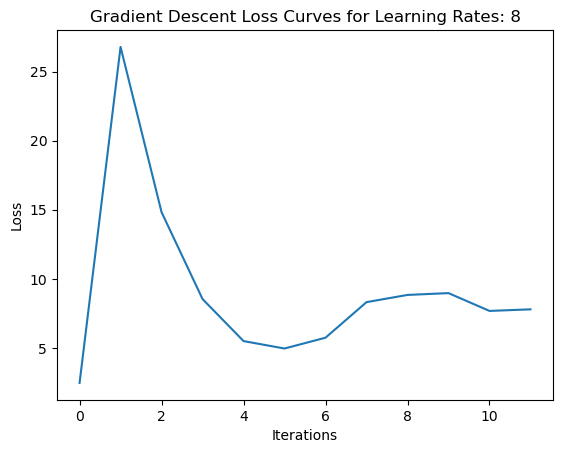

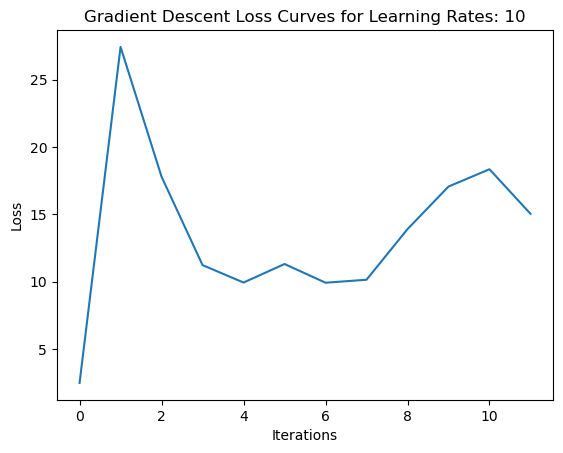

In [6]:
learning_rates = [0.1, 0.5, 3, 5, 8, 10]

plt.figure(figsize=(10, 6))

for lr in learning_rates:
    model = MLP(hidden_layer_sizes=(10,), activation='relu',
                learning_rate_init=lr, random_state=42)
    model.fit(data, label)
    
    pred = model.predict(data)
    
    plt.plot(model.loss_curve_)

    plt.gca().set_xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Gradient Descent Loss Curves for Learning Rates: {lr}')
    plt.show()

# Optimal Parameter

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=42)

model = MLP(tol = 0, hidden_layer_sizes = (20,), activation = 'tanh',
            learning_rate_init = 0.1, random_state = 120)
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

accuracy_train = accuracy_score(y_train, train_predictions)
accuracy_test = accuracy_score(y_test, test_predictions)
error_train = 1 - accuracy_train
error_test = 1 - accuracy_test

print("Error Ratio Train:", error_train)
print("Error Ratio Test:", error_test)

print("\nClassification Report:\n", classification_report(y_test, test_predictions))

Error Ratio Train: 0.0
Error Ratio Test: 0.5625

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       1.00      0.67      0.80         3
           4       0.50      0.50      0.50         2
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         0

    accuracy                           0.44        16
   macro avg       0.50      0.41      0.44        16
weighted avg       0.56      0.44      0.48        16



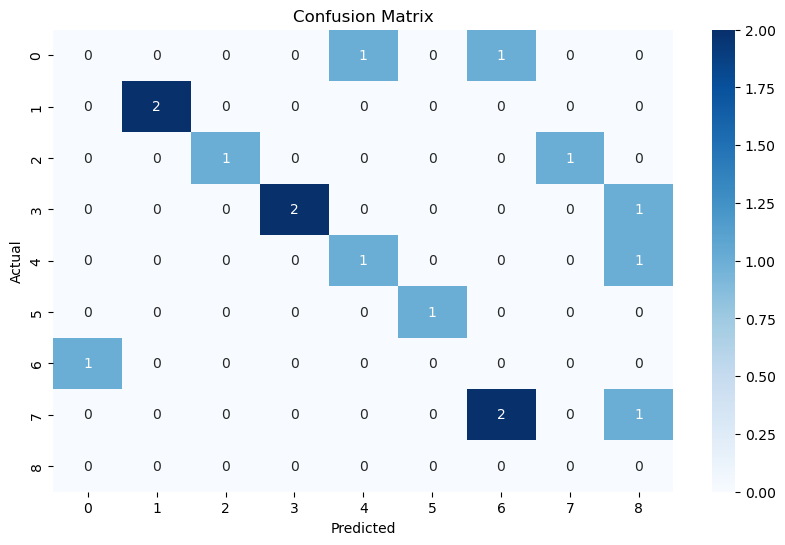

In [8]:
conf_matrix = confusion_matrix(y_test, test_predictions)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.gca().set_xlabel('Predicted')
plt.ylabel('Actual')
plt.show()